In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ==========================================
# 1. LOAD DATA & INITIAL ANALYSIS
# ==========================================
df = pd.read_csv('grey_market_data_enhanced.csv')

print("--- Dataset Overview ---")
print(df.info())


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_title    506 non-null    object 
 1   price_usd        506 non-null    int64  
 2   seller_name      506 non-null    object 
 3   seller_location  506 non-null    object 
 4   stock_level      504 non-null    object 
 5   image_url        503 non-null    object 
 6   review_score     503 non-null    float64
 7   shipping_origin  506 non-null    object 
 8   sales_rank       506 non-null    int64  
 9   grey_risk_flag   506 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 39.7+ KB
None


In [29]:
print("\n--- Descriptive Statistics ---")
df.describe(include='all')


--- Descriptive Statistics ---


,product_title,price_usd,seller_name,seller_location,stock_level,image_url,review_score,shipping_origin,sales_rank,grey_risk_flag
count,506,5.060000e+02,506,506,504,503,503.000000,506,506.000000,506
unique,506,NaN,505,6,4,4,NaN,7,NaN,3
top,Electronics Product 500,NaN,US Census Bureau,Asia,High,https://ex.com/img.jpg,NaN,India,NaN,High
freq,1,NaN,2,170,179,500,NaN,177,NaN,180
mean,NaN,4.317394e+09,NaN,NaN,NaN,NaN,2.945527,NaN,5045.047431,NaN
std,NaN,8.399727e+10,NaN,NaN,NaN,NaN,1.176401,NaN,2896.923502,NaN
min,NaN,6.400000e+01,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN
25%,NaN,1.209000e+03,NaN,NaN,NaN,NaN,1.900000,NaN,2609.000000,NaN
50%,NaN,2.402000e+03,NaN,NaN,NaN,NaN,2.900000,NaN,5040.500000,NaN
75%,NaN,3.633750e+03,NaN,NaN,NaN,NaN,3.950000,NaN,7417.000000,NaN


/tmp/ipython-input-3061346096.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grey_risk_flag', data=df, palette='viridis', order=['Low', 'Medium', 'High'])


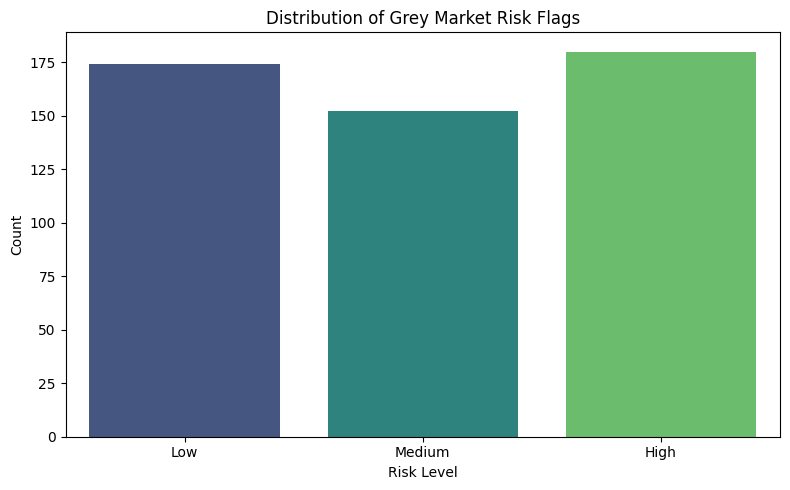

In [30]:
# ==========================================
# 2. DATA VISUALIZATION (EDA)
# ==========================================

# A. Risk Flag Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='grey_risk_flag', data=df, palette='viridis', order=['Low', 'Medium', 'High'])
plt.title('Distribution of Grey Market Risk Flags')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('eda_risk_distribution.png')


/tmp/ipython-input-718153644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grey_risk_flag', y='price_usd', data=df, palette='Set2')


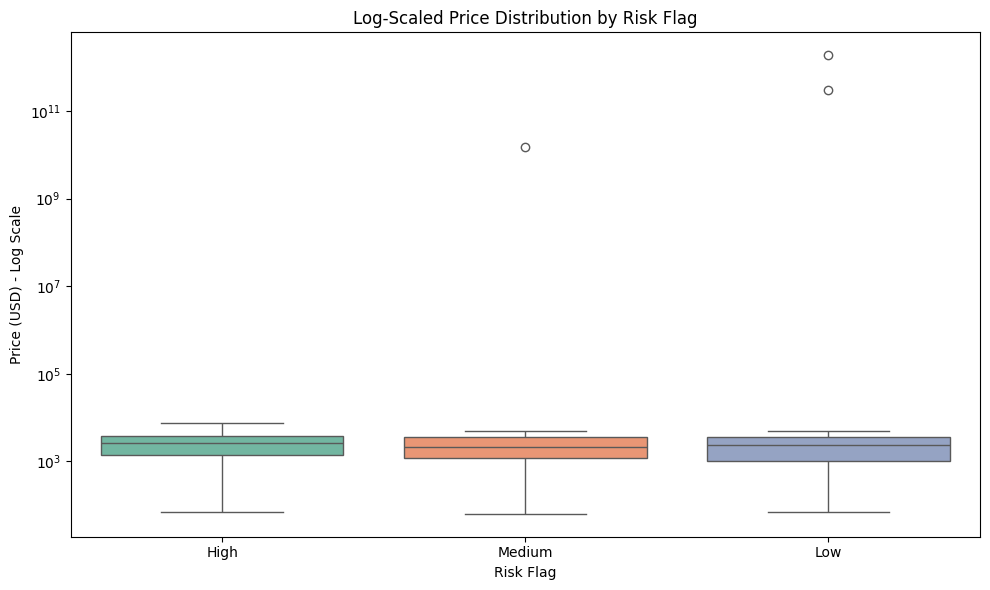

In [31]:

# B. Price Distribution by Risk (Log Scale to handle wide price ranges)
plt.figure(figsize=(10, 6))
sns.boxplot(x='grey_risk_flag', y='price_usd', data=df, palette='Set2')
plt.yscale('log')
plt.title('Log-Scaled Price Distribution by Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('Price (USD) - Log Scale')
plt.tight_layout()
plt.savefig('eda_price_vs_risk.png')



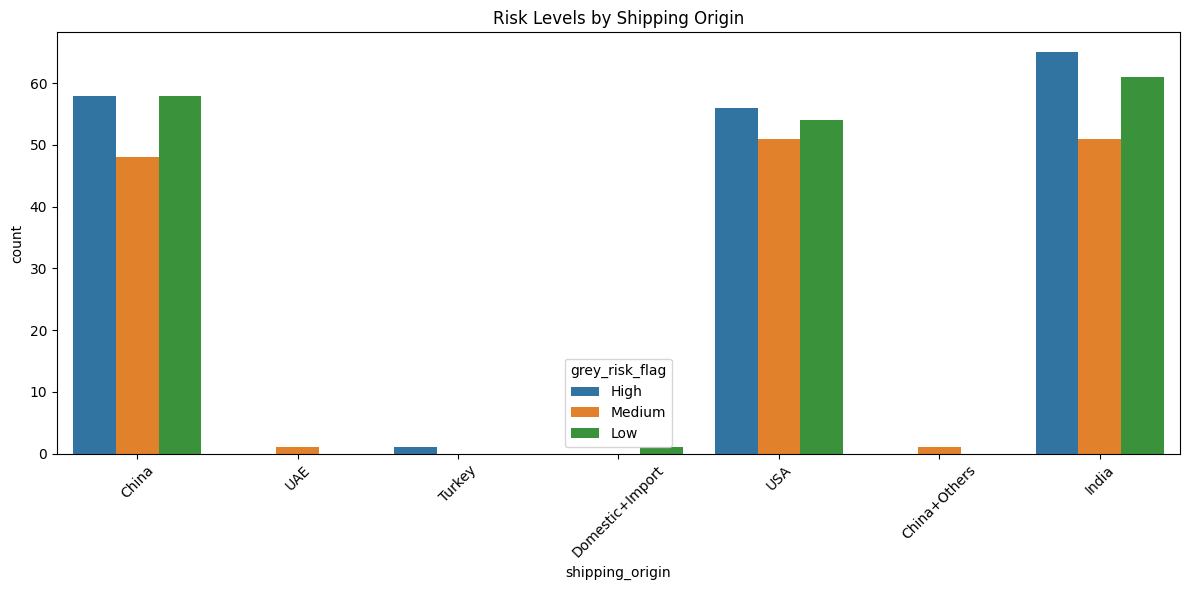

In [32]:
# C. Shipping Origin vs Risk
plt.figure(figsize=(12, 6))
sns.countplot(x='shipping_origin', hue='grey_risk_flag', data=df)
plt.title('Risk Levels by Shipping Origin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('eda_shipping_vs_risk.png')


In [33]:

# ==========================================
# 3. MODEL BUILDING (PREPARATION)
# ==========================================
# Encoding categorical columns for ML compatibility
le = LabelEncoder()
df_model = df.copy()

# Simple NaN handling for model stability
df_model['review_score'] = df_model['review_score'].fillna(df_model['review_score'].median())

# Encoding Categorical Features
categorical_cols = ['seller_location', 'shipping_origin', 'stock_level']
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Encode Target Risk Flag
le_target = LabelEncoder()
df_model['target'] = le_target.fit_transform(df_model['grey_risk_flag'])
target_labels = le_target.classes_

# Feature Selection
features = ['price_usd', 'review_score', 'sales_rank', 'seller_location', 'shipping_origin', 'stock_level']
X = df_model[features]
y = df_model['target']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [34]:
# ==========================================
# 4. TRAINING & PREDICTION
# ==========================================
clf = RandomForestClassifier(n_estimators=100, .random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics Report
print("\n--- Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_labels))




--- Model Performance ---
Accuracy: 41.18%

Classification Report:
              precision    recall  f1-score   support

        High       0.43      0.50      0.46        36
         Low       0.39      0.40      0.39        35
      Medium       0.42      0.32      0.36        31

    accuracy                           0.41       102
   macro avg       0.41      0.41      0.41       102
weighted avg       0.41      0.41      0.41       102



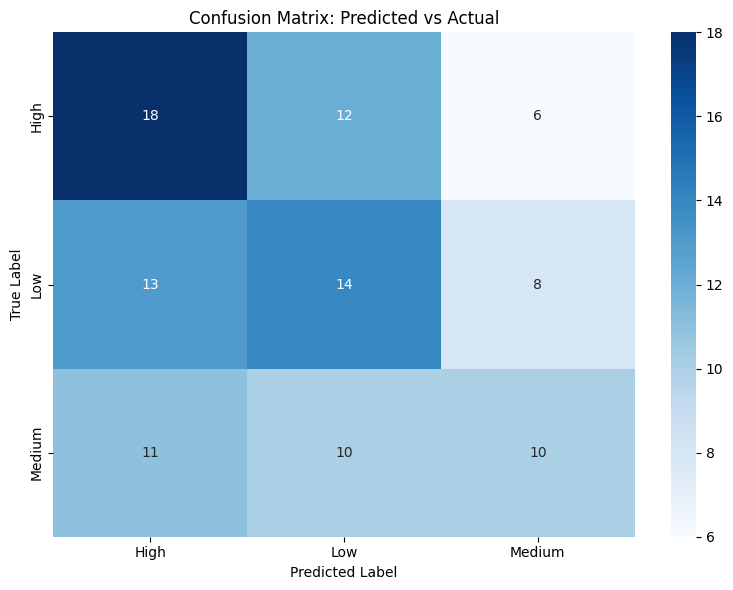

In [35]:
# ==========================================
# 5. MODEL VISUALIZATION
# ==========================================

# A. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
plt.title('Confusion Matrix: Predicted vs Actual')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('model_confusion_matrix.png')



All visualizations and model results generated successfully.


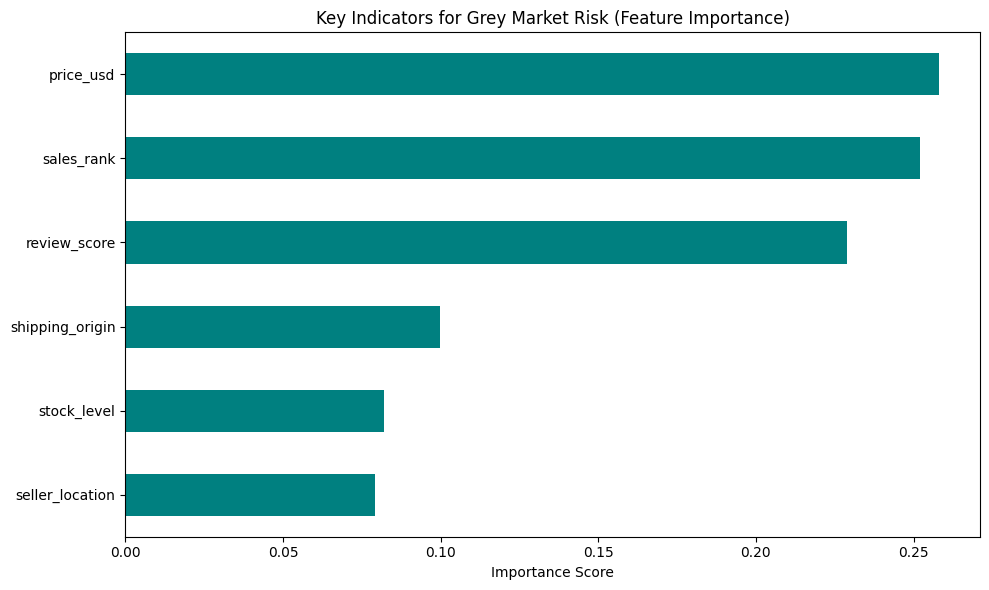

In [27]:

# B. Feature Importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=True)
feat_importances.plot(kind='barh', color='teal')
plt.title('Key Indicators for Grey Market Risk (Feature Importance)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('model_feature_importance.png')

print("\nAll visualizations and model results generated successfully.")